# K-Means Clustering SPAM Filter - Preliminary Analysis

Student Name: Nikolai Alexander


Group Members: ____ (up to 2 others) 

**If you are working in a group, you should EACH submit a copy of your proposal.  The copies may be identical.**

Please provide a link to the data set you wish to analyze.

## Link to Enron Email Data Set
Link to data set: https://www.cs.cmu.edu/~enron/ $\leftarrow$ Going to use the *Enron-Spam in pre-proccessed form* data to avoid any "reinventing of the wheel"

## Packages

In [1]:
# Utility Packages
import os
import re
from concurrent.futures import ThreadPoolExecutor
import unicodedata
import time

# Data Science & Mathematics Packages 
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Data Visualization
import matplotlib.pyplot as plt

## Extract Data & Split into Test/Train

In [2]:
'''
# List all emails contained in the HAM and SPAM directories
'''

ham_emails = os.listdir('data/ham')
spam_emails = os.listdir('data/spam')

print("# of HAM emails: {0}".format(len(ham_emails)))
print(ham_emails[:10])
print()
print("# of SPAM emails: {0}".format(len(spam_emails)))
print(spam_emails[:10])

# of HAM emails: 16383
['0001.1999-12-10.farmer.ham.txt', '0001.1999-12-10.kaminski.ham.txt', '0001.2000-01-17.beck.ham.txt', '0001.2000-06-06.lokay.ham.txt', '0001.2001-02-07.kitchen.ham.txt', '0001.2001-04-02.williams.ham.txt', '0002.1999-12-13.farmer.ham.txt', '0002.2001-02-07.kitchen.ham.txt', '0003.1999-12-10.kaminski.ham.txt', '0003.1999-12-14.farmer.ham.txt']

# of SPAM emails: 16383
['0002.2001-05-25.SA_and_HP.spam.txt', '0002.2003-12-18.GP.spam.txt', '0002.2004-08-01.BG.spam.txt', '0003.2003-12-18.GP.spam.txt', '0003.2004-08-01.BG.spam.txt', '0004.2001-06-12.SA_and_HP.spam.txt', '0004.2004-08-01.BG.spam.txt', '0005.2001-06-23.SA_and_HP.spam.txt', '0005.2003-12-18.GP.spam.txt', '0006.2001-06-25.SA_and_HP.spam.txt']


In [3]:
'''
# Create HAM (0) and SPAM (1) classes, and push email filenames and classes to data frame. Then, split new data frame
# into training and tested sets for preprocessing. 
'''

# Create HAM and SPAM Classes & push to data frame.
emails = ham_emails + spam_emails
email_class = [0]*len(ham_emails) + [1]*len(spam_emails)
data = pd.DataFrame(data={'email': emails, 'spam': email_class})

# Split data in to 80% training set & 20% testing set
train, test = train_test_split(data, train_size=0.8, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print("Train size: {0}".format(len(train)))
print("Test size: {0}".format(len(test)))
display(train)

Train size: 26212
Test size: 6554


,email,spam
0,2229.2001-09-01.kitchen.ham.txt,0
1,0202.2000-01-12.kaminski.ham.txt,0
2,3915.2005-03-15.BG.spam.txt,1
3,4985.2005-04-24.GP.spam.txt,1
4,2027.2001-08-16.kitchen.ham.txt,0
5,1903.2001-08-06.kitchen.ham.txt,0
6,2769.2000-10-12.kaminski.ham.txt,0
7,2393.2001-08-22.williams.ham.txt,0
8,4027.2005-01-25.GP.spam.txt,1
9,1641.2000-07-14.farmer.ham.txt,0


## Preprocessing

### Extract Raw Data From Training Emails

In [4]:
'''
# Strips diacritics (accents) from all characters.
# Copied from https://stackoverflow.com/questions/517923/what-is-the-best-way-to-remove-accents-in-a-python-unicode-string
#     - s - string containing diacritics
'''
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

In [5]:
'''
# Extracts all text from a list of emails contained in a directory and returns two lists split by email subject and email body 
#      * path - The path to the directory in which the emails are contained
#      * emails - List of all emails contained within the path
'''
def extract_emails(path, emails):
    # Initialize nested lists where each nested list is an email and the elements
    # of the nested list are words contained in the email
    subject_list = ['']*len(emails)
    body_list = ['']*len(emails)
    
    # Iterate through each email file
    for i in range(len(emails)):
        # Open email file and read the text
        with open(path + emails[i]) as file:
            text = file.readlines()

        # If the email is empty, set subject and body to None
        if len(text) == 0:
            subject = []
            body = []
        # If there is only 1 line, set line to the subject and set body to None
        elif len(text) == 1:
            subject = strip_accents(text[0])
            body = []
        # If there is more than 1 line, set line 1 to subject and the remaining lines to body
        else:
            subject = strip_accents(text[0])
            body = strip_accents(' '.join(text[1:]))
        
        # Remove "Subject: " from subject line
        if subject:
            subject = re.sub('Subject: ', '', subject)
            subject = re.sub('\n', '', subject)
            subject = re.sub(' +', ' ', subject)
            subject = re.sub(' $', '', subject)
        if body:
            body = re.sub('\n', '', body)
            body = re.sub(' +', ' ', body)
            body = re.sub(' $', '', body)
            
        # Add list of subject/body words to their respective lists
        subject_list[i] = subject
        body_list[i] = body
        
    return subject_list, body_list

In [6]:
'''
# Extract text contained in all SPAM & HAM emails. Store lists of subject lines and email bodies in
# seperate lists for HAM and SPAM emails.
'''

# Store SPAM email & HAM email filenames into seperate lists
spam_emails = train[train['spam'] == 1].email.tolist()
ham_emails = train[train['spam'] == 0].email.tolist()

# Multithreading to speed up runtime
with ThreadPoolExecutor() as e:
    # Extract all email text from SPAM & HAM emails
    t1 = e.submit(extract_emails, 'data/spam/', spam_emails)
    t2 = e.submit(extract_emails, 'data/ham/', ham_emails)
    spam_subjects_raw, spam_bodies_raw = t1.result()
    ham_subjects_raw, ham_bodies_raw = t2.result()

In [7]:
print(ham_subjects_raw[:5])
print(ham_bodies_raw[:3])

['headcount report', 're : energy conference', 'analyst comments on developments at enron', 'united way update', 're : matthew williams']
["hi louise , when we met on friday you mentioned that the headcount report was still wrong . if you can let me know what your concerns are , i ' d be happy to research . thanks !", 'mark , we are really swamped and i would like to keep our involvement in conferences to a reasonable minimum . i can promise that we shall help you with a future conference if it happens to be in houston . vince mark thabet on 01 / 10 / 2000 12 : 58 : 56 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : energy conference vince : i am sorry to hear about your scheduling conflict . your expertise would have been a great value to our conference . is there anyone else at your company whom you could recommend as a speaker ? thanks again for your time . mark thabet vp , energy shirley crenshaw subject : re : energy conference mark , i am sorry to inform you that d

In [8]:
print(spam_subjects_raw[:5])
print(spam_bodies_raw[:3])

['marketing for you', 'want to make love like crazy ?', 'internet ph % armacy', 'emerging small cap', 'announcing herbal smoking alternatives']
['stable offshore resources topromote your services / products : - e - mail list according to your order - send emailing according to your order - direct mail server ( cheap ! ) - offshore web hosting more information waiting for your prompt confirmation . please kindly reply to marketingtoyou @ 126 . com lisa sales dept no again : la @ hotmail . com ? subject = bruceg @ em . ca', 'start increasing your odds of success live sexually healthy . easy and imperceptible to take . take just a candy and become ready for 36 hours of love . this is most modern and safe way not to cover with shame only 15 minutes to wait fda approved soft tabs order will be packaged discreetly for your privacy and protection . remove !', 'welcome ! its time to stop wasting money on prescription drugs . get them online for 80 % off ! you can always rely on our fast , disc

### Extract All Words From Emails' Texts

In [9]:
'''
# Removes all punctuation and splits all strings into list of words. Returns a nested list where the outer list is the list of all
# emails and the inner lists are lists of all words contained in the emails.
#       * text_list - list of strings
'''
def extract_words(text_list):
    # Initialize empty nested list for inserting through indexing
    word_list = [[]]*len(text_list)
    
    # Iterate through each email file
    for idx, text in zip(range(len(text_list)), text_list):
        # Clean subject and body texts
        if text:
            # Remove all punctuation, line breaks, extra spaces, and tailing spaces
            text = re.sub('[!\"#$%&\'()*+,-./:;<=>?@\[\\]^_`{|}~]', '', text)
            text = re.sub(' +', ' ', text)
            text = re.sub(' $', '', text)

            # Split subject into list of words
            text = text.split(' ')
        else:
            text = []

        # Add list of subject/body words to their respective lists
        word_list[idx] = text
        
    return word_list

In [10]:
'''
# Run extract_words function (defined above) on each of the above text lists extracted for each email.
'''

# Multithreading to speed up runtime
with ThreadPoolExecutor() as e:
    t1 = e.submit(extract_words, spam_subjects_raw)
    t2 = e.submit(extract_words, spam_bodies_raw)
    t3 = e.submit(extract_words, ham_subjects_raw)
    t4 = e.submit(extract_words, ham_bodies_raw)
    
    # Extract all words (no punctuation) from SPAM bodies and subjects
    spam_subjects = t1.result()
    spam_bodies = t2.result()
    
    # Extract all words (no punctuation) from HAM bodies and subjects
    ham_subjects = t3.result()
    ham_bodies = t4.result()

In [11]:
print(spam_subjects[:5])
print(spam_bodies[:3])

[['marketing', 'for', 'you'], ['want', 'to', 'make', 'love', 'like', 'crazy'], ['internet', 'ph', 'armacy'], ['emerging', 'small', 'cap'], ['announcing', 'herbal', 'smoking', 'alternatives']]
[['stable', 'offshore', 'resources', 'topromote', 'your', 'services', 'products', 'e', 'mail', 'list', 'according', 'to', 'your', 'order', 'send', 'emailing', 'according', 'to', 'your', 'order', 'direct', 'mail', 'server', 'cheap', 'offshore', 'web', 'hosting', 'more', 'information', 'waiting', 'for', 'your', 'prompt', 'confirmation', 'please', 'kindly', 'reply', 'to', 'marketingtoyou', '126', 'com', 'lisa', 'sales', 'dept', 'no', 'again', 'la', 'hotmail', 'com', 'subject', 'bruceg', 'em', 'ca'], ['start', 'increasing', 'your', 'odds', 'of', 'success', 'live', 'sexually', 'healthy', 'easy', 'and', 'imperceptible', 'to', 'take', 'take', 'just', 'a', 'candy', 'and', 'become', 'ready', 'for', '36', 'hours', 'of', 'love', 'this', 'is', 'most', 'modern', 'and', 'safe', 'way', 'not', 'to', 'cover', 'wit

In [12]:
print(ham_subjects[:5])
print(ham_bodies[:3])

[['headcount', 'report'], ['re', 'energy', 'conference'], ['analyst', 'comments', 'on', 'developments', 'at', 'enron'], ['united', 'way', 'update'], ['re', 'matthew', 'williams']]
[['hi', 'louise', 'when', 'we', 'met', 'on', 'friday', 'you', 'mentioned', 'that', 'the', 'headcount', 'report', 'was', 'still', 'wrong', 'if', 'you', 'can', 'let', 'me', 'know', 'what', 'your', 'concerns', 'are', 'i', 'd', 'be', 'happy', 'to', 'research', 'thanks'], ['mark', 'we', 'are', 'really', 'swamped', 'and', 'i', 'would', 'like', 'to', 'keep', 'our', 'involvement', 'in', 'conferences', 'to', 'a', 'reasonable', 'minimum', 'i', 'can', 'promise', 'that', 'we', 'shall', 'help', 'you', 'with', 'a', 'future', 'conference', 'if', 'it', 'happens', 'to', 'be', 'in', 'houston', 'vince', 'mark', 'thabet', 'on', '01', '10', '2000', '12', '58', '56', 'pm', 'to', 'vince', 'j', 'kaminski', 'hou', 'ect', 'ect', 'cc', 'subject', 're', 'energy', 'conference', 'vince', 'i', 'am', 'sorry', 'to', 'hear', 'about', 'your', 

### Extract All Punctuation From Emails' Texts

In [13]:
'''
# Extracts all punctuation from a list of strings. Returns a nested list where the outer list is a list of emails and
# the inner list is a list of all punctuation in each email
#     * text_list - list of strings
'''
def extract_punctuation(text_list):
    # Initialize nested list to store punctuation
    punc_list = [[]]*len(text_list)
    
    # Iterate through each email file
    for idx, text in zip(range(len(text_list)), text_list):
        # Clean subject and body texts
        if text:
            # Remove all punctuation, line breaks, extra spaces, and tailing spaces
            punc = text
            punc = re.sub(' +', '', punc)
            punc = re.sub('[a-z0-9]+', ' ', punc)
            punc = re.sub('\s\.{2,}\s', ' ... ', punc)
            punc = re.sub('\s\?{2,}\s', ' ??? ', punc)
            punc = re.sub('\s\!{2,}\s', ' !!! ', punc)
            punc = re.sub(' $', '', punc)
            punc = re.sub('^ ', '', punc)
            
            
            punc = punc.split(' ')
        else:
            punc = []

        # Add list of subject/body words to their respective lists
        punc_list[idx] = punc
        
    return punc_list 

In [14]:
# Multithreading to speed up runtime
with ThreadPoolExecutor() as e:
    t1 = e.submit(extract_punctuation, spam_subjects_raw)
    t2 = e.submit(extract_punctuation, spam_bodies_raw)
    t3 = e.submit(extract_punctuation, ham_subjects_raw)
    t4 = e.submit(extract_punctuation, ham_bodies_raw)
    
    # Extract all words (no punctuation) from SPAM bodies and subjects
    spam_subj_punc = t1.result()
    spam_bod_punc = t2.result()
    
    # Extract all words (no punctuation) from HAM bodies and subjects
    ham_subj_punc = t3.result()
    ham_bod_punc = t4.result()

In [15]:
print(spam_subj_punc[:5])
print(spam_bod_punc[:3])

[[''], ['?'], ['%'], [''], ['']]
[['/', ':-', '-', '-', '-', '(', '!)-', '.', '@', '.', ':', '@', '.', '?', '=', '@', '.'], ['.', '.', '.', '.', '!'], ['!', '.', '%', '!', ',', '!', ',', ',', ',', ',', ',', '...', '!', '!', '!!!', ',', '.', ',', '!!-', '-', ',', '$', '.', ',', '$', '.', ',', '$', '.', ',', '$', '.', '://', '.', '/?', '!', '!']]


In [16]:
print(ham_subj_punc[:5])
print(ham_bod_punc[:3])

[[''], [':'], [''], [''], [':']]
[[',', '.', ',', "'", '.', '!'], [',', '.', '.', '/', '/', ':', ':', ':', '/', '/', '@', ':', ':', ':', ':', '.', '.', '?', '.', ',', ':', ':', ',', '.', '.', '/', '/', ':', ':', ':', '/', '/', '@', ':', ':', ':', '.', ',', '-', ',', '.', ',', '.', '"', '"', '.', '.', '.', ',', '-', '-', '.', '.', '.>', ',', '&', ',', ',', ':', '-', '-', ':', '-', '-', '>'], ['....-----', '-----', ':', ',', ':', ',', ',', ':', ':', ',', ':', '...']]


### Weight Words by Ratio of SPAM/HAM Emails (+1 SPAM / -1 HAM)

In [17]:
'''
# Extracts all unique words in each email and returns a list of lists where the nested list
# is each email and the elements of the nested list are the unique words.
#     * subjects - List of all words in the subjects of each email
#     * bodies - List of all words in the bodies of each email
'''
def unique_words(subjects, bodies):
    # Initialize list of all emails and their unique words
    word_lists = [[]]*len(bodies)
    
    # Iterate through all emails (subject & bodies always same length)
    for i in range(len(bodies)):
        # Concatenate words from subject and body into one list and
        # Initlialize the list of all unique words
        try:
            all_words = subjects[i] + bodies[i]
        except TypeError as e:
            print(i)
            print(subjects[i])
            print()
            print(bodies[i])
            raise TypeError(e)
        unique_words = ['']*len(all_words)
        
        # Sorts words alphabetically for index search
        all_words.sort()
    
        # Iterate through all words, if word does not appear in
        # the previous index, add word to list of unique words.
        j = 0
        for word in all_words:
            if j == 0 or word != unique_words[j-1]:
                unique_words[j] = word
                j += 1
        
        # Trim the remaining empty spaces from the unique word list
        try:
            unique_words = unique_words[:unique_words.index('')]
        except ValueError as e:
            unique_words = unique_words
        
        # Add list of unique words to the list of emails
        word_lists[i] = unique_words

    return word_lists

In [18]:
'''
# Exports a list of all unique words and the number of emails each word appears in.
#     * words - A list of emails where the elements of each email are unique words contained in the email
'''
def word_count(words):
    # Concatenate all words into a sorted list
    word_list = []
    for word in words:
        word_list += word
    word_list.sort()
    
    # Remove all empty strings an escaped characters from word_list
    start_idx = 0
    for w in word_list:
        try:
            if len(w) == 0:
                start_idx += 1
            # First non-escaped character is a 0.
            elif w != '0':
                start_idx += 1
            else:
                break
        except:
            start_idx += 1
    word_list = word_list[start_idx:]

    # Remove all '\' from word list
    start_filter = 0
    end_filter = 0
    for w in word_list:
        try:
            if re.match('^[0-9a-z].*', w) and start_filter >= end_filter:
                start_filter += 1
            elif w == '\\':
                if end_filter == 0:
                    end_filter += start_filter + 1
                else:
                    end_filter += 1
        except:
            continue
    word_list = word_list[:start_filter] + word_list[end_filter+1:]

    # Remove all special characters from word list
    end_idx = 0
    for w in word_list:
        if re.match('^[0-9a-z].*', w):
            end_idx += 1
    word_list = word_list[:end_idx+1]

    # Initialize lists of each word and their respective counts
    word_string = ['']*len(word_list)
    word_cnt = [0]*len(word_list)

    # Iterate through each word - if word is not in the word_list, add to list and
    # Increase count to 1. If word is in list, increase count by 1
    idx = 0
    for i in range(len(word_list)):
        if i == 0:
            word_string[idx] = word_list[i]
            word_cnt[idx] += 1
            idx += 1
        elif word_list[i] != word_list[i-1]:
            word_string[idx] = word_list[i]
            word_cnt[idx] += 1
            idx += 1
        else:
            word_cnt[idx-1] += 1
            
    # Trim excess reserved data
    word_string = word_string[:idx]
    word_cnt = word_cnt[:idx]
    
    return word_string, word_cnt

In [19]:
'''
# Returns a data frame of unique words weighted by the ratio of the words occurance between SPAM and HAM emails.
# The data frame contains the number and percentage of emails the word appears in for HAM and SPAM and a weight
# for the word, +1 pure SPAM / -1 pure HAM. Does not include words with less than 1% support threshold for both
# HAM & SPAM emails (seperately)
#     * ham_subjects - List of subjects contained in HAM emails
#     * ham_bodies - List of email bodies contained in HAM emails
      * spam_subject - List of subjects contained in SPAM emails
#     * ham_subject - List of email bodies contained in SPAM emails
'''
def init_word_weights(ham_subjects, ham_bodies, spam_subjects, spam_bodies):
    # Multithreading to speed up runtime
    with ThreadPoolExecutor() as e:
        # Extract all unique words from the HAM and SPAM emails
        t1 = e.submit(unique_words, ham_subjects, ham_bodies)
        t2 = e.submit(unique_words, spam_subjects, spam_bodies)
        ham_words = t1.result()
        spam_words = t2.result()

        # Count number of times word appears in HAM and SPAM emails
        t1 = e.submit(word_count, ham_words)
        t2 = e.submit(word_count, spam_words)
        ham_str, ham_cnt = t1.result()
        spam_str, spam_cnt = t2.result() 

    # Compile data into DataFrames of each word, count, and percentage of emails the word appears in
    spam_df = pd.DataFrame(data={
        'word': spam_str, 
        'spam_count': spam_cnt, 
        'spam_perc': [c/len(spam_emails) for c in spam_cnt]
    })
    ham_df = pd.DataFrame(data={
        'word': ham_str, 
        'ham_count': ham_cnt, 
        'ham_perc': [c/len(ham_emails) for c in ham_cnt]
    })

    # Merge data frames
    word_df = spam_df.merge(ham_df, how='outer', on='word')

    # Replace all NA values with 0
    word_df = word_df.fillna(0.0)
    word_df['ham_count'] = word_df['ham_count'].astype(int)
    word_df['spam_count'] = word_df['spam_count'].astype(int)


    # Calculate weight of spam word based on its ratio with spam
    # +1 - SPAM, -1 - HAM
    word_df['spam_weight'] = [1 - h/s if s >= h else s/h - 1 for s,h in zip(word_df['spam_perc'], word_df['ham_perc'])]

    # Remove any words with less than 1% support for SPAM or HAM emails
    word_df = word_df[(word_df['spam_perc'] >= .01) | (word_df['ham_perc'] >= .01)]

    # Sort by spam_weight from highest to lowest
    word_df = word_df.sort_values(['ham_count'], ascending=True)
    word_df = word_df.sort_values(['spam_weight', 'spam_count'], ascending=False).reset_index(drop=True)

    return word_df

In [20]:
word_df = init_word_weights(ham_subjects, ham_bodies, spam_subjects, spam_bodies)

word_df

,word,spam_count,spam_perc,ham_count,ham_perc,spam_weight
0,viagra,776,0.059196,0,0.000000,1.0
1,php,641,0.048898,0,0.000000,1.0
2,meds,465,0.035472,0,0.000000,1.0
3,cialis,450,0.034328,0,0.000000,1.0
4,pills,391,0.029827,0,0.000000,1.0
5,photoshop,384,0.029293,0,0.000000,1.0
6,wiil,365,0.027843,0,0.000000,1.0
7,macromedia,332,0.025326,0,0.000000,1.0
8,medications,326,0.024868,0,0.000000,1.0
9,stationery,308,0.023495,0,0.000000,1.0


### Weight Punctuation by Ratio of SPAM/HAM Emails (+1 SPAM / -1 HAM)

In [21]:
'''
# Exports a list of all unique words and the number of emails each word appears in.
#     * words - A list of emails where the elements of each email are unique words contained in the email
'''
def punc_count(words):
    # Concatenate all words into a sorted list
    word_list = []
    for word in words:
        word_list += word
    word_list.sort()

    # Initialize lists of each word and their respective counts
    word_string = ['']*len(word_list)
    word_cnt = [0]*len(word_list)

    # Iterate through each word - if word is not in the word_list, add to list and
    # Increase count to 1. If word is in list, increase count by 1
    idx = 0
    for i in range(len(word_list)):
        if i == 0:
            word_string[idx] = word_list[i]
            word_cnt[idx] += 1
            idx += 1
        elif word_list[i] != word_list[i-1]:
            word_string[idx] = word_list[i]
            word_cnt[idx] += 1
            idx += 1
        else:
            word_cnt[idx-1] += 1
            
    # Trim excess reserved data
    word_string = word_string[:idx]
    word_cnt = word_cnt[:idx]
    
    return word_string, word_cnt

In [22]:
'''
# Returns a data frame of unique punctuation weighted by the ratio of the puntuation's occurance between SPAM and HAM emails.
# The data frame contains the number and percentage of emails the punctuation appears in for HAM and SPAM and a weight
# for the word, +1 pure SPAM / -1 pure HAM. Does not include punctuation with less than 1% support threshold for both
# HAM & SPAM emails (seperately)
#     * ham_subjects - List of subjects contained in HAM emails
#     * ham_bodies - List of email bodies contained in HAM emails
      * spam_subject - List of subjects contained in SPAM emails
#     * ham_subject - List of email bodies contained in SPAM emails
'''
def init_punc_weights(ham_subjects, ham_bodies, spam_subjects, spam_bodies):
    # Multithreading to speed up runtime
    with ThreadPoolExecutor() as e:
        # Extract all unique words from the HAM and SPAM emails
        t1 = e.submit(unique_words, ham_subjects, ham_bodies)
        t2 = e.submit(unique_words, spam_subjects, spam_bodies)
        ham_words = t1.result()
        spam_words = t2.result()

        t1 = e.submit(punc_count, ham_words)
        t2 = e.submit(punc_count, spam_words)
        ham_str, ham_cnt = t1.result()
        spam_str, spam_cnt = t2.result() 

    # Compile data into DataFrames to be merged
    spam_df = pd.DataFrame(data={'word': spam_str, 'count': spam_cnt, 'perc': [c/len(spam_emails) for c in spam_cnt]})
    ham_df = pd.DataFrame(data={'word': ham_str, 'count': ham_cnt, 'perc': [c/len(ham_emails) for c in ham_cnt]})

    # Merge data into 1 dataframe
    word_df = spam_df.merge(ham_df, how='outer', on='word')
    word_df.columns = ['word', 'spam_count', 'spam_perc', 'ham_count', 'ham_perc']
    word_df = word_df.fillna(0)
    word_df['ham_count'] = word_df['ham_count'].astype(int)
    word_df['spam_count'] = word_df['spam_count'].astype(int)


    # Calculate weight of punctuation based on its ratio with SPAM & HAM
    word_df['spam_weight'] = [1 - h/s if s >= h else s/h - 1 for s,h in zip(word_df['spam_perc'], word_df['ham_perc'])]

    # Remove any words with less than 1% support for SPAM or HAM emails
    word_df = word_df[(word_df['spam_perc'] >= .01) | (word_df['ham_perc'] >= .01)]

    # Sort by spam_weight from highest to lowest
    word_df = word_df.sort_values(['ham_count'], ascending=True)
    word_df = word_df.sort_values(['spam_weight', 'spam_count'], ascending=False).reset_index(drop=True)

    return word_df

In [23]:
punc_df = init_punc_weights(ham_subj_punc, ham_bod_punc, spam_subj_punc, spam_bod_punc)

punc_df

,word,spam_count,spam_perc,ham_count,ham_perc,spam_weight
0,?=,177,0.013502,5,0.000382,0.971738
1,=?,179,0.013655,6,0.000458,0.966465
2,/?,362,0.027615,14,0.001068,0.961308
3,||,203,0.015486,10,0.000763,0.950716
4,|,350,0.026699,23,0.001755,0.934256
5,`,194,0.014799,18,0.001374,0.907174
6,!-,210,0.016020,24,0.001832,0.885662
7,""">",198,0.015104,34,0.002595,0.828204
8,:$,363,0.027691,76,0.005800,0.790538
9,://,2428,0.185216,631,0.048157,0.739996


### Preprocessing Training Set

In [24]:
'''
# Weights each list of words based on the average weight of each word contained in the respective
# list.
#     * text_list - Nested list of words, where each outer word is an email
#     * word_df - Data frame of unique word weights
'''
def text_weight(text_list, word_df):
    # Split data frame into lists for indexing
    spam_words = word_df['word'].tolist()
    spam_weights = word_df['spam_weight'].tolist()
    
    # Iterate through list of emails and calculate the weight of the
    # email based on average weight of each word.
    text_weights = [0.0]*len(text_list)
    for i, text in zip(range(len(text_list)), text_list):
        if len(text) > 0:
            for word in text:
                try:
                    text_weights[i] += spam_weights[spam_words.index(word)]
                except ValueError as e:
                    pass
            text_weights[i] /= len(text)
        
    return text_weights

In [25]:
'''
# Weights each list of punctuation based on the average weight of each punctuation contained in the respective
# list.
#     * body_list - Nested list of punctuation contained in the body of each email
#     * subject_list - Nested list of punctuation contained in the subject of each email
#     * word_df - Data frame of unique word weights
'''
def punc_weight(body_list, subject_list, word_df):
    # Import DF series into list for indexing
    spam_words = word_df['word'].tolist()
    spam_weights = word_df['spam_weight'].tolist()
    
    punc_weights = [0.0]*len(body_list)
    for i, body, subject in zip(range(len(body_list)), body_list, subject_list):
        punc_list = subject + body
        if len(punc_list) > 0:
            for punc in punc_list:
                try:
                    punc_weights[i] += spam_weights[spam_words.index(punc)]
                except ValueError as e:
                    pass
            punc_weights[i] /= len(punc_list)
        
    return punc_weights

In [26]:
# Concatenate HAM email words and SPAM emails words into one list
emails = ham_emails + spam_emails
email_bodies = ham_bodies + spam_bodies
email_subjects = ham_subjects + spam_subjects

# Multithreading to speed up runtime
tmp_df = pd.DataFrame({'email': emails})
with ThreadPoolExecutor() as e:
    # Weight each email subject line and body by contained words
    t1 = e.submit(text_weight, email_bodies, word_df)
    t2 = e.submit(text_weight, email_subjects, word_df)
    tmp_df['body_weight'] = t1.result()
    tmp_df['subject_weight'] = t2.result()

train = train.merge(tmp_df, how='left', on='email')

In [27]:
# Calculate the total weight of all words in each email (subject & body together)
email_words = [subj + bdy for subj,bdy in zip(email_subjects, email_bodies)]

# Weight the total email weight by the contained words
tmp_df = pd.DataFrame({'email': emails})
tmp_df['total_weight'] = text_weight(email_words, word_df)

train = train.merge(tmp_df, how='left', on='email')

In [28]:
# Calculate the weight of all punctuation for each email (subject & body together)
email_bodies_punc = ham_bod_punc + spam_bod_punc
email_subjects_punc = ham_subj_punc + spam_subj_punc

# Weight each email by the average weight of each punctuation contained in the email
tmp_df = pd.DataFrame({'email': emails})
tmp_df['punc_weight'] = punc_weight(email_bodies_punc, email_subjects_punc, punc_df)

train = train.merge(tmp_df, how='left', on='email')

In [29]:
# Final weighted training set
train

,email,spam,body_weight,subject_weight,total_weight,punc_weight
0,2229.2001-09-01.kitchen.ham.txt,0,-0.365993,-0.080692,-0.349691,0.022712
1,0202.2000-01-12.kaminski.ham.txt,0,-0.319852,-0.775861,-0.324010,-0.258981
2,3915.2005-03-15.BG.spam.txt,1,0.134225,0.014671,0.127821,-0.100500
3,4985.2005-04-24.GP.spam.txt,1,0.145866,0.089639,0.140594,0.083919
4,2027.2001-08-16.kitchen.ham.txt,0,-0.413709,-0.582199,-0.446320,-0.187989
5,1903.2001-08-06.kitchen.ham.txt,0,-0.198744,0.069870,-0.195546,0.162005
6,2769.2000-10-12.kaminski.ham.txt,0,-0.453183,-0.476711,-0.453437,-0.335684
7,2393.2001-08-22.williams.ham.txt,0,-0.045627,-0.573086,-0.086200,-0.002672
8,4027.2005-01-25.GP.spam.txt,1,0.261741,0.098931,0.257341,0.249969
9,1641.2000-07-14.farmer.ham.txt,0,-0.293607,-0.296939,-0.295035,-0.076090


## Exploratory Analysis

In [30]:
'''
# Helper function for Simple Linear Regression
'''

'''
# Estimates the slope of the SLR line
'''
def estimateBeta(x, y):
    assert len(x) == len(y), "x and y must be the same length"
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the sums in the numerator and denominator
    num = 0
    den = 0
    for i in range(len(x)) : 
        num += (x[i] - x_mean) * (y[i] - y_mean)
        den += (x[i] - x_mean)**2
        
    return num/den


'''
# Estimates the y-intercept of the SLR line
'''
def estimateAlpha(beta, x, y) :
    return np.mean(y) - np.mean(x) * beta


'''
# Estimates y based on the SLR line
'''
def estimateY(x, alpha, beta):
    return alpha + x * beta


'''
# Calculates the error between the actual value of y and the estimated value of y
'''
def residualPoint(x, y, alpha, beta):
    return y - alpha - beta * x


'''
# Calculates the standard error of y
'''
def SE(x, y, y_est):
    n = len(x)
    x_mean = np.mean(x)
    
    sigma = np.sqrt(np.sum([(real - est)**2 for real,est in zip(y, y_est)]) / (n - 2))
    
    return sigma/np.sqrt(np.sum([(i - x_mean)**2]))


'''
# Calculates the total sum of squares
'''
def SST(y):
    return np.sum([(i - np.mean(y))**2 for i in y])


'''
# Calculates the residual sum of squares
'''
def SSR(y_pred, y):
    return np.sum([(real - est)**2 for real,est in zip(y, y_pred)])


'''
# Calculates the coefficient of determination
'''
def R_squared(y, y_pred):
    return 1 - SSR(y_pred, y) / SST(y)

In [31]:
'''
# Fits a Simple Linear Regression Model to analyse the correlation between attributes
'''
def SLR(x, y):
    # Calculate the slope and intercept of the SLR
    beta = estimateBeta(x, y) 
    alpha = estimateAlpha(beta, x, y)
    
    # Estimate y based on alpha and beta
    yest = [estimateY(i, alpha, beta) for i in x]
    
    # Calculate t statistic
    t = beta/SE(x, y, yest)
    
    # Calculate the p-value for H0: beta = 0, H1: beta != 0
    p = 2 * stats.t.cdf(-np.abs(t), df=len(x) - 1)
    
    
    # Calculate the coefficient of determination
    R2 = R_squared(y, yest)
    
    return {'yest': yest, 'alpha': alpha, 'beta': beta, 'pvalue': p, 'R2': R2}

In [32]:
# Calculate the Pearson correlation coefficients
corr_summ = train.corr()
corr_summ

,spam,body_weight,subject_weight,total_weight,punc_weight
spam,1.000000,0.843316,0.676338,0.847901,0.617207
body_weight,0.843316,1.000000,0.698250,0.981355,0.691289
subject_weight,0.676338,0.698250,1.000000,0.750771,0.524207
total_weight,0.847901,0.981355,0.750771,1.000000,0.701520
punc_weight,0.617207,0.691289,0.524207,0.701520,1.000000


In [33]:
'''
# Calculates the factorial of n
'''
def factorial(n):
    return int(np.prod([i for i in range(1, n+1)]))

'''
# Calulates the number of r-combinations for n objects
'''
def Combinations(n,r=2):
    return int(factorial(n)/(factorial(r) * factorial(n - r)))

In [34]:
train_col = train.columns.tolist()[2:]
t_n = len(train_col)
comb = Combinations(t_n, 2)

# Initlialize parameters for all outputs of SLR line
atr1 = ['']*comb
atr2 = ['']*comb
corr = [0.0]*comb
p_value = [0.0]*comb
r_squared = [0.0]*comb
slope = [0]*comb
y_int = [0.0]*comb
yests = [[0.0]*len(train)]*comb

idx = 0
for i in range(t_n):
    for j in range(i+1,t_n):
        # Calculate the parameters of the Simple Linear Regression Line
        slr = SLR(train[train_col[i]], train[train_col[j]])
        
        # Insert attributes into lists
        atr1[idx] = train_col[i]
        atr2[idx] = train_col[j]
        corr[idx] = corr_summ.loc[train_col[i], train_col[j]]
        p_value[idx] = slr['pvalue']
        r_squared[idx] = slr['R2']
        slope[idx] = slr['beta']
        y_int[idx] = slr['alpha'] 
        yests[idx] = slr['yest']
        idx += 1

# Summaries data in a dataframe
summary = pd.DataFrame(data={
    'attribute_1': atr1, 
    'attribute_2': atr2, 
    'correlation': corr, 
    'p_value': p_value, 
    'r_squared': r_squared, 
    'slope': slope, 
    'y-intercept': y_int
})

summary

,attribute_1,attribute_2,correlation,p_value,r_squared,slope,y-intercept
0,body_weight,subject_weight,0.698250,6.179829e-01,0.487553,1.116556,0.006751
1,body_weight,total_weight,0.981355,9.044120e-03,0.963058,1.002904,-0.000286
2,body_weight,punc_weight,0.691289,6.247392e-01,0.477881,0.567229,-0.037722
3,subject_weight,total_weight,0.750771,2.477612e-04,0.563657,0.479812,-0.055262
4,subject_weight,punc_weight,0.524207,4.715488e-02,0.274793,0.268987,-0.069095
5,total_weight,punc_weight,0.701520,6.511596e-21,0.492131,0.563256,-0.037820


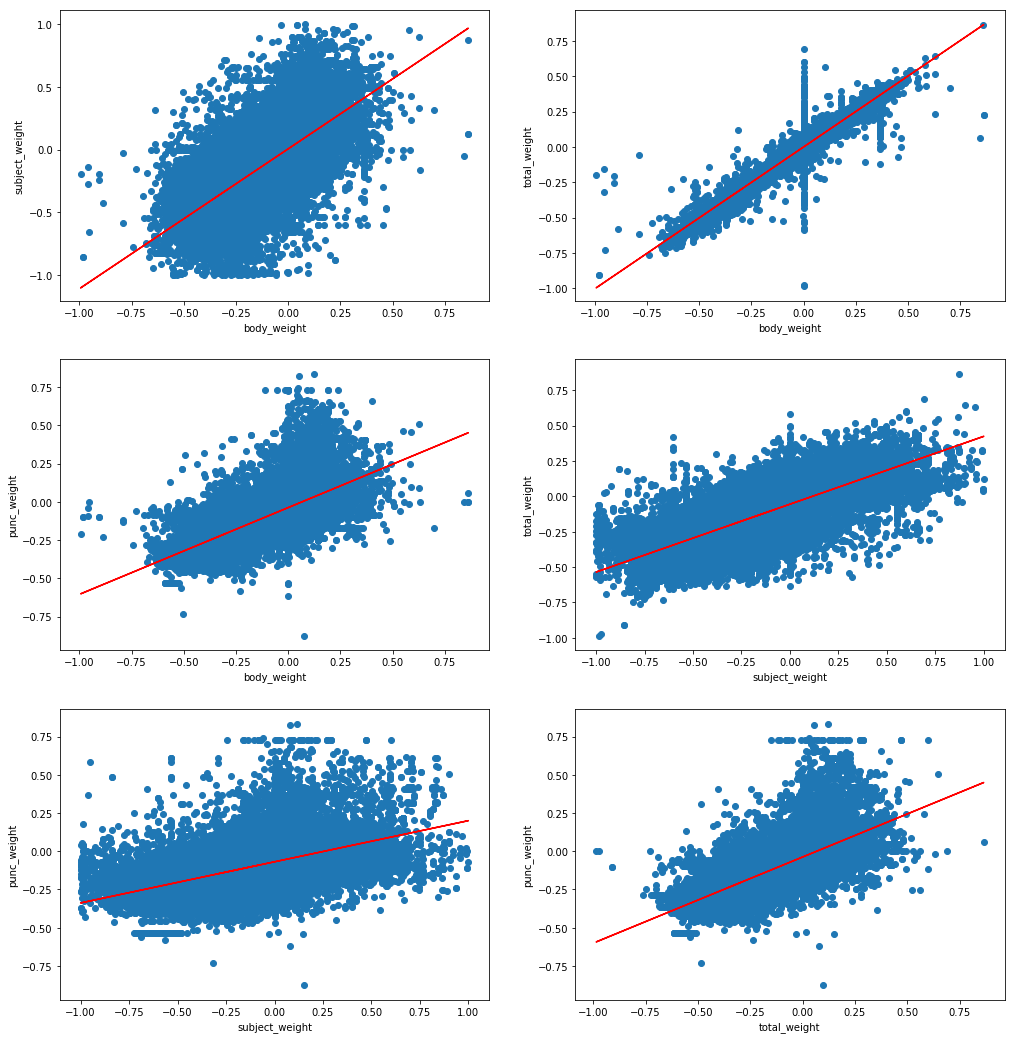

In [35]:
fig, ax = plt.subplots(3,2, figsize=(15,10))
plt.subplots_adjust(right=1, top=1.5)

# Plot each pair of attributes relationships in a scatterplot, and their respective SLR lines 
k = 0
for i in range(comb//2):
    for j in range(2):
        slr_mtrx = ax[i, j].scatter(train[atr1[k]], train[atr2[k]])
        slr_mtrx = ax[i, j].plot(train[atr1[k]], yests[k], c='r')
        slr_mtrx = ax[i, j].set_xlabel(atr1[k])
        slr_mtrx = ax[i, j].set_ylabel(atr2[k])
        k += 1

## K-Means Clustering

### Training the Data

In [36]:
'''
# Helper Function - Calculates the Euclidean distance between two points
#     * x - List/array of coordinates for a point
#     * y - List/array of coordinates for a point
'''
def L2_distance(x, y):
    return np.sqrt(np.sum([(i-j)**2 for i,j in zip(x,y)]))

'''
# Helper Function - Calculates the Manhattan distance between two points
#     * x - List/array of coordinates for a point
#     * y - List/array of coordinates for a point
'''
def L1_distance(x, y):
    return np.sum([np.abs(i-j) for i,j in zip(x,y)])

'''
# Helper Function - Calculates the Chebyshev distance between two points
#     * x - List/array of coordinates for a point
#     * y - List/array of coordinates for a point
'''
def Linf_distance(x, y):
    return max([np.abs(i-j) for i,j in zip(x,y)])

'''
# Helper Function - Calculates the L-r distance between two points
#     * x - List/array of coordinates for a point
#     * y - List/array of coordinates for a point
#     * r - Power that we are using for L-r
'''
def Lr_distance(x, y, r):
    return (np.sum([np.abs(i-j)**r for i,j in zip(x,y)]))**(1/r)

'''
# Helper Function - Calculates the cosine distance between two points
#     * x - List/array of coordinates for a point
#     * y - List/array of coordinates for a point
'''
def cos_distance(x, y):
    return 1 - np.dot(x,y)/(np.linalg.norm(x) * np.linalg.norm(y))

In [37]:
'''
# Trains the data to find the best centroids in order to classify each point
'''
def k_means_train(X, y, k=2, tol=0.001, niters=0, dist_metric='euclidean', lr=3):
    # Parameter checks
    if not isinstance(X, np.ndarray):
        # If X is a list, convert to an array
        if isinstance(X, list):
            X = np.array(X)
        # If X is not a list or an array, raise ValueError
        else:
            raise ValueError('X must be an nxm array where n > 1 and m > 1.')
    if not isinstance(y, np.ndarray) or len(y.shape) != 1:
        raise ValueError('y must be a nx1 array where n >= 1.')
    if not isinstance(tol, float) or tol <= 0:
        if isinstance(tol, int):
            tol = float(tol)
        else:
            raise ValueError('tol must be a positive float.')
    if not isinstance(niters, int) or niters < 0:
        if isinstance(niters, float) and niters == niters // 1:
            niters = int(niters)
        else:
            raise ValueError('niters must be a positive integer.')
    if dist_metric not in ['euclidean', 'manhattan', 'inf', 'lr']:
        raise ValueError("dist must be 'euclidean', 'manhattan', 'inf', or 'lr'")
    if dist_metric == 'lr' and not isinstance(lr, int):
        if isinstance(lr, float) and lr == lr//1 and lr > 0:
            lr = int(lr)
        raise ValueError("lr must be an integer greater than 0.")
    
    # Initialize centroids - Since we are only predicting for SPAM/HAM, k = 2
    centroids = np.array([[0.0]*len(X[0,:])]*k)
    pred_y = np.array([-1]*len(X))
    
    # Assign furthest point to the left of 0 to centroid 0
    X_ham = [coord for coord in X if all(i <= 0 for i in coord)]
    max_dist = -np.inf
    for coord in X_ham:
        if dist_metric == 'euclidean':
            dist = L2_distance(coord, [0]*len(coord))
        elif dist_metric == 'manhattan':
            dist = L1_distance(coord, [0]*len(coord))
        elif dist_metric == 'inf':
            dist = Linf_distance(coord, [0]*len(coord))
        elif dist_metric == 'lr':
            dist = Lr_distance(coord, [0]*len(coord), lr)
        
        if dist > max_dist:
            max_dist = dist
            centroids[0] = coord
    
    # Assign the furthest point from the other points for each k-cluster
    for i in range(1,k):
        max_dist = -np.inf
        for coord in X:
            # Calculate the distance
            if dist_metric == 'euclidean':
                dist = np.mean([L2_distance(centroids[j], coord) for j in range(len(centroids[:i]))])
            elif dist_metric == 'manhattan':
                dist = np.mean([L1_distance(centroids[j], coord) for j in range(len(centroids[:i]))])
            elif dist_metric == 'inf':
                dist = np.mean([Linf_distance(centroids[j], coord) for j in range(len(centroids[:i]))])
            elif dist_metric == 'lr':
                dist = np.mean([Lr_distance(centroids[j], coord, lr) for j in range(len(centroids[:i]))])
                
            if dist > max_dist:
                max_dist = dist
                centroids[i] = coord
    
    # Set tol to inf to ignore this part of the while loop if there is a variable for niters
    if niters > 0:
        tol = np.inf
        itr = 0
    # If niters = 0, then set itr to be 1.
    else:
        itr = 1
    change = np.inf
    while change > tol or itr < niters:
        cent_old = centroids.copy()

        for i, coord in zip(range(len(X)),X):
            # Assign points to their respective clusters
            min_dist = np.inf
            for clust, cent in zip(range(len(centroids)),centroids):
                # Calculate distance from each cluster
                if dist_metric == 'euclidean':
                    dist = L2_distance(coord, cent)
                elif dist_metric == 'manhattan':
                    dist = L1_distance(coord, cent)
                elif dist_metric == 'inf':
                    dist = Linf_distance(coord, cent)
                elif dist_metric == 'lr':
                    dist = Lr_distance(coord, cent, lr)
                
                if dist < min_dist:
                    min_dist = dist
                    pred_y[i] = clust

        # Update centroids
        for i in range(len(centroids)):
            clust_points = np.array([coord for clust,coord in zip(pred_y, X) if clust == i])
            centroids[i] = [np.mean(clust_points[:,j]) for j in range(len(centroids[i]))]

        # Calculate distance from each cluster
        if dist_metric == 'euclidean':
            change = max([L2_distance(cent_old[i,:], centroids[i,:]) for i in range(len(centroids))])
        elif dist_metric == 'manhattan':
            change = max([L1_distance(cent_old[i,:], centroids[i,:]) for i in range(len(centroids))])
        elif dist_metric == 'inf':
            change = max([Linf_distance(cent_old[i,:], centroids[i,:]) for i in range(len(centroids))])
        elif dist_metric == 'lr':
            change = max([Lr_distance(cent_old[i,:], centroids[i,:], lr) for i in range(len(centroids))])         
        itr += 1
  
    
    # Check statistical accuracy
    accuracy = sum([1 for i,j in zip(pred_y, y) if i == j])/len(y)
    conf_mtrx = confusion_matrix(y, pred_y)
    
    return centroids, pred_y, accuracy, conf_mtrx

#### Analyzing accuracy with different sets of attributes

In [38]:
# Seperate values into attribute and class
train_x = train[['body_weight', 'subject_weight', 'punc_weight']].values
train_y = train['spam'].values


train_pred = k_means_train(train_x.tolist(), train_y)
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.9079810773691439
Confusion Matrix:
 [[11317  1786]
 [  626 12483]]
Centroids:
 [[-0.29586788 -0.4157998  -0.21616568]
 [ 0.04420077  0.13327257 -0.00376277]]


In [39]:
# Seperate values into attribute and class
train_x = train[['body_weight', 'subject_weight']].values
train_y = train['spam'].values


train_pred = k_means_train(train_x.tolist(), train_y)
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.8943995116740424
Confusion Matrix:
 [[11039  2064]
 [  704 12405]]
Centroids:
 [[-0.29429157 -0.4243283 ]
 [ 0.03822079  0.13260464]]


In [40]:
# Seperate values into attribute and class
train_x = train[['body_weight', 'punc_weight']].values
train_y = train['spam'].values


train_pred = k_means_train(train_x.tolist(), train_y)
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.9648634213337403
Confusion Matrix:
 [[12413   690]
 [  231 12878]]
Centroids:
 [[-0.30243945 -0.2195861 ]
 [ 0.06789468  0.01039865]]


In [41]:
# Seperate values into attribute and class
train_x = train[['total_weight', 'punc_weight']].values
train_y = train['spam'].values


train_pred = k_means_train(train_x.tolist(), train_y)
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.9676102548451091
Confusion Matrix:
 [[12491   612]
 [  237 12872]]
Centroids:
 [[-0.30660207 -0.21866289]
 [ 0.07295008  0.01095992]]


#### Testing Different Distance Metrics

In [42]:
# Seperate values into attribute and class
train_x = train[['total_weight', 'punc_weight']].values
train_y = train['spam'].values

train_pred = k_means_train(train_x.tolist(), train_y, dist_metric='euclidean')
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.9676102548451091
Confusion Matrix:
 [[12491   612]
 [  237 12872]]
Centroids:
 [[-0.30660207 -0.21866289]
 [ 0.07295008  0.01095992]]


In [43]:
train_pred = k_means_train(train_x.tolist(), train_y, dist_metric='manhattan')
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.9621165878223714
Confusion Matrix:
 [[12427   676]
 [  317 12792]]
Centroids:
 [[-0.30542399 -0.21949999]
 [ 0.07228623  0.01202481]]


In [44]:
train_pred = k_means_train(train_x.tolist(), train_y, dist_metric='inf')
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.968335113688387
Confusion Matrix:
 [[12441   662]
 [  168 12941]]
Centroids:
 [[-0.30901163 -0.217948  ]
 [ 0.07186322  0.00828851]]


In [45]:
train_pred = k_means_train(train_x.tolist(), train_y, dist_metric='lr', lr=3)
print('Accuracy: {0}'.format(train_pred[2]))
print('Confusion Matrix:\n {0}'.format(train_pred[3]))
print('Centroids:\n {0}'.format(train_pred[0]))

Accuracy: 0.9686784678773082
Confusion Matrix:
 [[12493   610]
 [  211 12898]]
Centroids:
 [[-0.30723532 -0.21830107]
 [ 0.07287127  0.01021165]]


#### Picking the best r for L-r Distance Metric

In [46]:
acc_list = []
r_list = []
for r in range(1,11):
    acc_list.append(k_means_train(train_x.tolist(), train_y, dist_metric='lr', lr=r)[2])
    r_list.append(r)
    
print(acc_list)

[0.9621165878223714, 0.9676102548451091, 0.9686784678773082, 0.9691744239279719, 0.9691362734625363, 0.9689073706699222, 0.9686403174118724, 0.9686784678773082, 0.9684877155501297, 0.968449565084694]


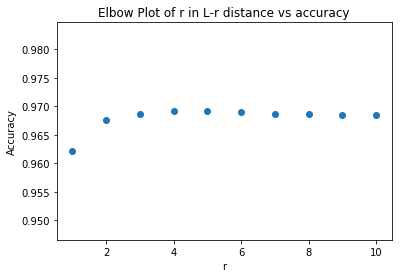

In [47]:
elbow = plt.scatter(x=r_list, y=acc_list)
elbow = plt.title("Elbow Plot of r in L-r distance vs accuracy")
elbow = plt.ylabel("Accuracy")
elbow = plt.xlabel("r")

#### Picking the best tol

In [48]:
acc_list = []
tol_list = []
test_tol = 0.1
while test_tol >= 0.00001:
    acc_list.append(k_means_train(train_x.tolist(), train_y, dist_metric='euclidean', tol=test_tol)[2])
    tol_list.append(test_tol)
    test_tol /= 10
    
print(acc_list)

[0.9686403174118724, 0.9678391576377232, 0.9676102548451091, 0.967495803448802, 0.967495803448802]


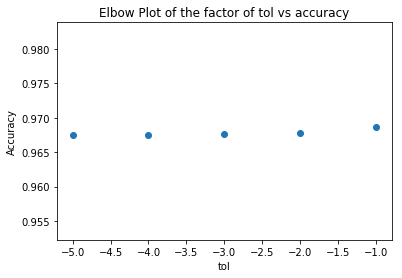

In [49]:
elbow = plt.scatter(x=np.log10(tol_list), y=acc_list)
elbow = plt.title("Elbow Plot of the factor of tol vs accuracy")
elbow = plt.ylabel("Accuracy")
elbow = plt.xlabel("tol")

### Training the data with the best performing parameters

In [50]:
# Seperate values into attribute and class
train_x = train[['total_weight', 'punc_weight']].values
train_y = train['spam'].values

In [51]:
centroids, pred_y, accuracy, cnf_mtrx = k_means_train(train_x, train_y, dist_metric='euclidean', tol=0.01)
print('Accuracy: {0}'.format(accuracy))
print('Confusion Matrix:\n {0}'.format(cnf_mtrx))
print('Centroids:\n {0}'.format(centroids))

Accuracy: 0.9678391576377232
Confusion Matrix:
 [[12513   590]
 [  253 12856]]
Centroids:
 [[-0.30602192 -0.21833687]
 [ 0.07347193  0.01129933]]


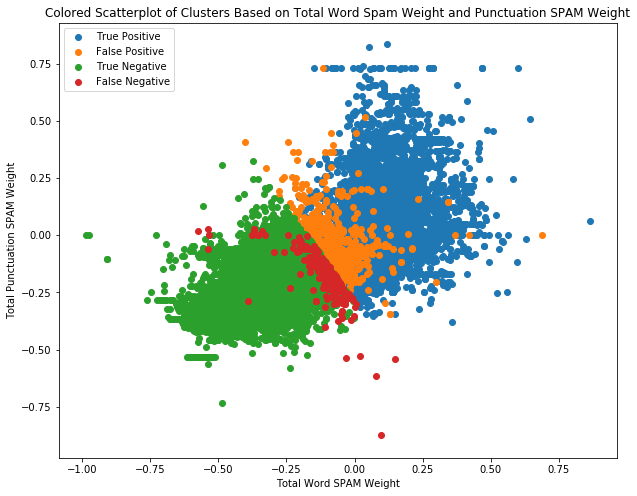

In [52]:
train['pred_spam'] = pred_y

tp = train[(train['spam'] == 1) & (train['pred_spam'] == 1)][['total_weight', 'punc_weight']].reset_index(drop=True)
fp = train[(train['spam'] == 0) & (train['pred_spam'] == 1)][['total_weight', 'punc_weight']].reset_index(drop=True)
tn = train[(train['spam'] == 0) & (train['pred_spam'] == 0)][['total_weight', 'punc_weight']].reset_index(drop=True)
fn = train[(train['spam'] == 1) & (train['pred_spam'] == 0)][['total_weight', 'punc_weight']].reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(10,8))

train_clusters = plt.scatter(x=tp['total_weight'], y=tp['punc_weight'])
train_clusters = plt.scatter(x=fp['total_weight'], y=fp['punc_weight'])
train_clusters = plt.scatter(x=tn['total_weight'], y=tn['punc_weight'])
train_clusters = plt.scatter(x=fn['total_weight'], y=fn['punc_weight'])

train_clusters = plt.title('Colored Scatterplot of Clusters Based on Total Word Spam Weight and Punctuation SPAM Weight')
train_clusters = plt.xlabel('Total Word SPAM Weight')
train_clusters = plt.ylabel('Total Punctuation SPAM Weight')
train_clusters = plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])

### Testing K-means Clustering Algorithm

#### Preprocessing Test Set

In [53]:
spam_emails = test[test['spam'] == 1].email.tolist()
ham_emails = test[test['spam'] == 0].email.tolist()
emails = ham_emails + spam_emails

# Multithreading to speed up runtime
with ThreadPoolExecutor() as e:
    # Extract all email text from SPAM & HAM emails
    t1 = e.submit(extract_emails, 'data/spam/', spam_emails)
    t2 = e.submit(extract_emails, 'data/ham/', ham_emails)

    # Email text are split by subject & body
    spam_subjects_raw, spam_bodies_raw = t1.result()
    ham_subjects_raw, ham_bodies_raw = t2.result()

In [54]:
# Multithreading to speed up runtime
with ThreadPoolExecutor() as e:
    t1 = e.submit(extract_words, spam_subjects_raw)
    t2 = e.submit(extract_words, spam_bodies_raw)
    t3 = e.submit(extract_words, ham_subjects_raw)
    t4 = e.submit(extract_words, ham_bodies_raw)
    
    # Extract all words (no punctuation) from SPAM bodies and subjects
    spam_subjects = t1.result()
    spam_bodies = t2.result()
    
    # Extract all words (no punctuation) from HAM bodies and subjects
    ham_subjects = t3.result()
    ham_bodies = t4.result()

In [55]:
# Multithreading to speed up runtime
with ThreadPoolExecutor() as e:
    t1 = e.submit(extract_punctuation, spam_subjects_raw)
    t2 = e.submit(extract_punctuation, spam_bodies_raw)
    t3 = e.submit(extract_punctuation, ham_subjects_raw)
    t4 = e.submit(extract_punctuation, ham_bodies_raw)
    
    # Extract all words (no punctuation) from SPAM bodies and subjects
    spam_subj_punc = t1.result()
    spam_bod_punc = t2.result()
    
    # Extract all words (no punctuation) from HAM bodies and subjects
    ham_subj_punc = t3.result()
    ham_bod_punc = t4.result()

In [56]:
# Concatenate HAM email words and SPAM emails words into one list
email_bodies = ham_bodies + spam_bodies
email_subjects = ham_subjects + spam_subjects
email_words = [subj + bdy for subj,bdy in zip(email_subjects, email_bodies)]

tmp_df = pd.DataFrame({'email': emails})
tmp_df['total_weight'] = text_weight(email_words, word_df)

test = test.merge(tmp_df, how='left', on='email')

In [57]:
email_bodies_punc = ham_bod_punc + spam_bod_punc
email_subjects_punc = ham_subj_punc + spam_subj_punc

# Multithreading to speed up runtime
tmp_df = pd.DataFrame({'email': emails})
tmp_df['punc_weight'] = punc_weight(email_bodies_punc, email_subjects_punc, punc_df)

test = test.merge(tmp_df, how='left', on='email')

test

,email,spam,total_weight,punc_weight
0,1711.2004-07-26.GP.spam.txt,1,-0.001516,0.045508
1,2042.2004-12-10.BG.spam.txt,1,0.067732,-0.077785
2,1605.2001-07-16.kitchen.ham.txt,0,-0.231130,-0.175277
3,2955.2004-11-26.GP.spam.txt,1,-0.029349,-0.097771
4,0536.2004-09-09.BG.spam.txt,1,0.114850,0.001347
5,3918.2005-01-15.GP.spam.txt,1,0.144346,0.428069
6,2381.2005-06-27.SA_and_HP.spam.txt,1,0.177611,0.399277
7,0948.2002-08-05.SA_and_HP.spam.txt,1,-0.019753,0.119728
8,1775.2004-08-08.GP.spam.txt,1,0.149200,0.024474
9,2639.2005-01-10.BG.spam.txt,1,-0.020512,0.329272


#### Classifying Test Set

In [58]:
'''
# Predicts whether or not an email in the testing set based on the centroids
# calculated from training the model
'''
def predict_spam(X, y, centroids, dist_metric='euclidean', lr=3):
    # Parameter checks
    if not isinstance(X, np.ndarray):
        # If X is a list, convert to an array
        if isinstance(X, list):
            X = np.array(X)
        # If X is not a list or an array, raise ValueError
        else:
            raise ValueError('X must be an nxm array where n > 1 and m > 1.')
    if not isinstance(y, np.ndarray) or len(y.shape) != 1:
        raise ValueError('y must be a nx1 array where n >= 1.')
    if dist_metric not in ['euclidean', 'manhattan', 'inf', 'lr']:
        raise ValueError("dist must be 'euclidean', 'manhattan', 'inf', or 'lr'")
    if dist_metric == 'lr' and not isinstance(lr, int):
        if isinstance(lr, float) and lr == lr//1 and lr > 0:
            lr = int(lr)
        raise ValueError("lr must be an integer greater than 0.")
    
    pred_y = np.array([-1]*len(X))    
    for i, coord in zip(range(len(X)),X):
        # Assign points to their respective clusters
        min_dist = np.inf
        for clust, cent in zip(range(len(centroids)),centroids):
            # Calculate distance from each cluster
            if dist_metric == 'euclidean':
                dist = L2_distance(coord, cent)
            elif dist_metric == 'manhattan':
                dist = L1_distance(coord, cent)
            elif dist_metric == 'inf':
                dist = Linf_distance(coord, cent)
            elif dist_metric == 'lr':
                dist = Lr_distance(coord, cent, lr)

            if dist < min_dist:
                min_dist = dist
                pred_y[i] = clust
                
    accuracy = sum([1 for i,j in zip(pred_y, y) if i == j])/len(y)
    conf_mtrx = confusion_matrix(y, pred_y)
    
    return pred_y, accuracy, conf_mtrx

In [59]:
# Seperate values into attribute and class
test_x = test[['total_weight', 'punc_weight']].values
test_y = test['spam'].values

In [60]:
pred_y, accuracy, cnf_mtrx = predict_spam(test_x, test_y, centroids, dist_metric='euclidean')
print('Accuracy: {0}'.format(accuracy))
print('Confusion Matrix:\n {0}'.format(cnf_mtrx))
print('Centroids:\n {0}'.format(centroids))

Accuracy: 0.9684162343606958
Confusion Matrix:
 [[3119  161]
 [  46 3228]]
Centroids:
 [[-0.30602192 -0.21833687]
 [ 0.07347193  0.01129933]]


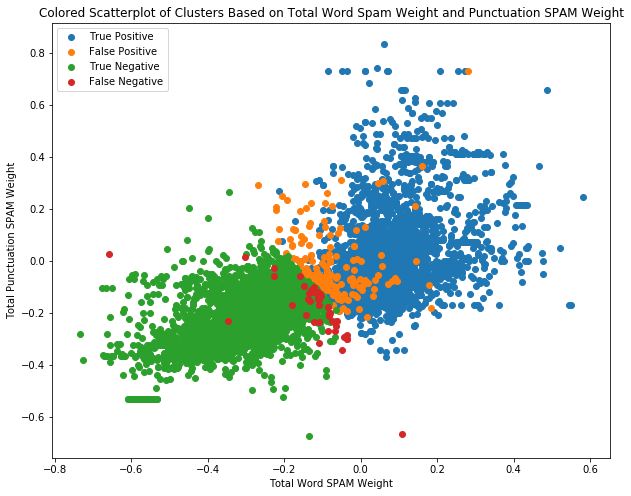

In [61]:
test['pred_spam'] = pred_y

tp = test[(test['spam'] == 1) & (test['pred_spam'] == 1)][['total_weight', 'punc_weight']].reset_index(drop=True)
fp = test[(test['spam'] == 0) & (test['pred_spam'] == 1)][['total_weight', 'punc_weight']].reset_index(drop=True)
tn = test[(test['spam'] == 0) & (test['pred_spam'] == 0)][['total_weight', 'punc_weight']].reset_index(drop=True)
fn = test[(test['spam'] == 1) & (test['pred_spam'] == 0)][['total_weight', 'punc_weight']].reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(10,8))

test_clusters = plt.scatter(x=tp['total_weight'], y=tp['punc_weight'])
test_clusters = plt.scatter(x=fp['total_weight'], y=fp['punc_weight'])
test_clusters = plt.scatter(x=tn['total_weight'], y=tn['punc_weight'])
test_clusters = plt.scatter(x=fn['total_weight'], y=fn['punc_weight'])

test_clusters = plt.title('Colored Scatterplot of Clusters Based on Total Word Spam Weight and Punctuation SPAM Weight')
test_clusters = plt.xlabel('Total Word SPAM Weight')
test_clusters = plt.ylabel('Total Punctuation SPAM Weight')
test_clusters = plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])